In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('/content/diabetesfornn.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,6,148,72,35,0,33.6,0.627,50,1,NaN,NaN,NaN,NaN
1,1,85,66,29,0,26.6,0.351,31,0,NaN,NaN,NaN,NaN
2,8,183,64,0,0,23.3,0.672,32,1,NaN,NaN,NaN,NaN
3,1,89,66,23,94,28.1,0.167,21,0,NaN,NaN,NaN,NaN
4,0,137,40,35,168,43.1,2.288,33,1,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0,NaN,NaN,NaN,NaN
764,2,122,70,27,0,36.8,0.340,27,0,NaN,NaN,NaN,NaN
765,5,121,72,23,112,26.2,0.245,30,0,NaN,NaN,NaN,NaN
766,1,126,60,0,0,30.1,0.349,47,1,NaN,NaN,NaN,NaN


<h1>Basic Operations

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
 9   Unnamed: 9                0 non-null      float64
 10  Unnamed: 10               0 non-null      float64
 11  Unnamed: 11               0 non-null      float64
 12  Unnamed: 12               0 non-null      float64
dtypes: float64(6), int64(7)
memory usage: 78.1 KB


In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,0.0,0.0,0.0,0.0
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958,NaN,NaN,NaN,NaN
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951,NaN,NaN,NaN,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000,NaN,NaN,NaN,NaN
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000,NaN,NaN,NaN,NaN
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000,NaN,NaN,NaN,NaN
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000,NaN,NaN,NaN,NaN
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000,NaN,NaN,NaN,NaN


In [ ]:
df.drop(['Unnamed: 9', 'Unnamed: 10','Unnamed: 11','Unnamed: 12'], axis = 1,inplace = True) 

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


<h1>EDA

<h1>a) Generate the correlation matrix

In [ ]:
df2= pd.DataFrame(df,columns=['Pregnancies','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age'])
corrMatrix = df.corr()
print (corrMatrix)


                          Pregnancies   Glucose  ...       Age   Outcome
Pregnancies                  1.000000  0.129459  ...  0.544341  0.221898
Glucose                      0.129459  1.000000  ...  0.263514  0.466581
BloodPressure                0.141282  0.152590  ...  0.239528  0.065068
SkinThickness               -0.081672  0.057328  ... -0.113970  0.074752
Insulin                     -0.073535  0.331357  ... -0.042163  0.130548
BMI                          0.017683  0.221071  ...  0.036242  0.292695
DiabetesPedigreeFunction    -0.033523  0.137337  ...  0.033561  0.173844
Age                          0.544341  0.263514  ...  1.000000  0.238356
Outcome                      0.221898  0.466581  ...  0.238356  1.000000

[9 rows x 9 columns]


<h1>b) Check the shape of the data set

In [ ]:
df.shape

(768, 9)

<h1>c) Visualize the first 10 rows of the data set

In [ ]:
df = pd.DataFrame(df) 
df.head(10)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


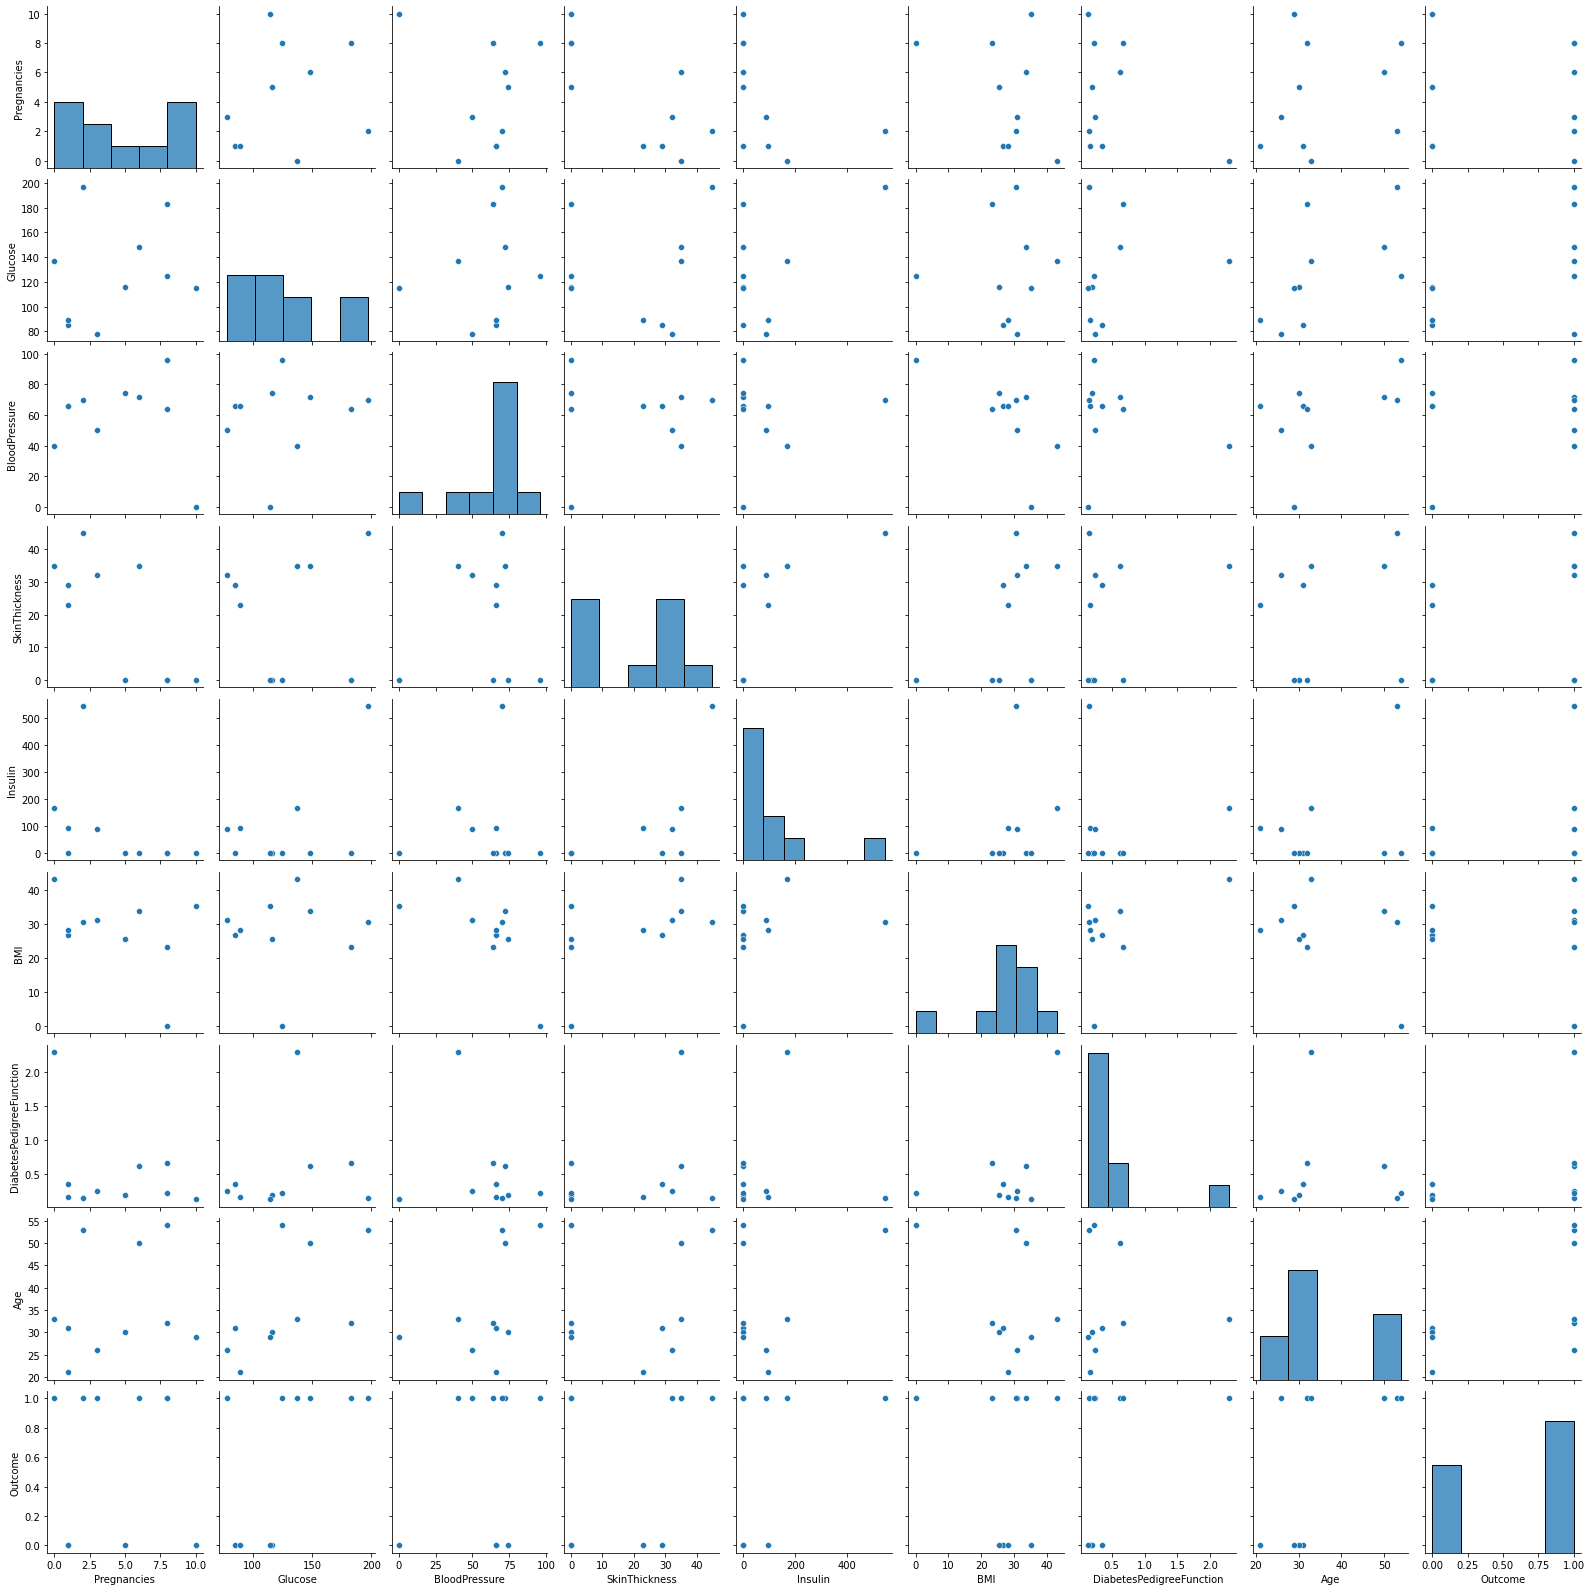

In [ ]:
sns.pairplot(df)

<h1>d) Generate a count plot for the target variable 

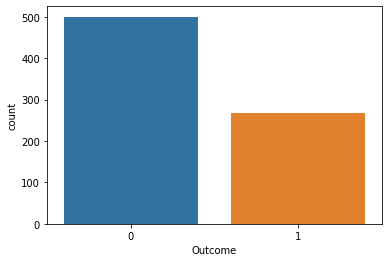

In [ ]:
sns.countplot(data = df, x = 'Outcome')
fig_dims = (12,6)

<h1>e) Plot a relationship between various factors and outcome

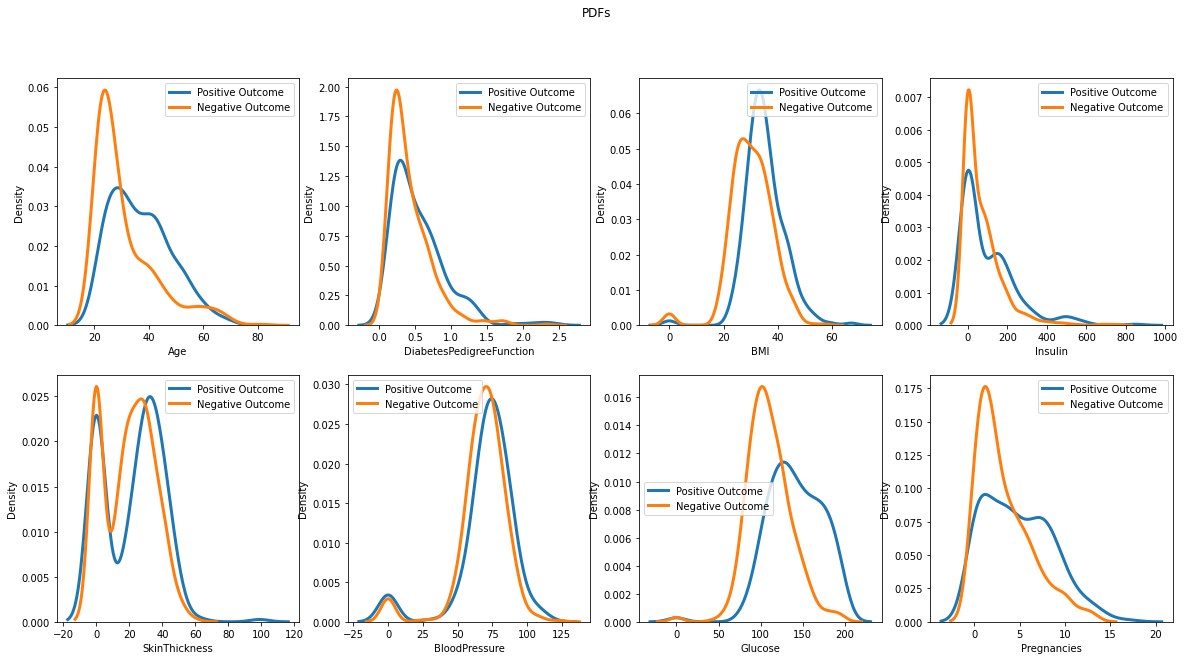

In [ ]:
f, axes = plt.subplots(2, 4,figsize=(20,10))
count=8

for i in range(2):
    for j in range(4):
        count=count-1
        sns.distplot(positive.iloc[:,count],kde=True,hist=False,kde_kws = {'linewidth': 3},label = 'Positive Outcome',ax = axes[i][j])
        sns.distplot(negative.iloc[:,count],kde=True,hist=False,kde_kws = {'linewidth': 3},label = 'Negative Outcome',ax = axes[i][j])
        axes[i][j].legend()
        
f.suptitle('PDFs')
plt.show()

<h1>ANN(Artificial Nueral Network)

In [ ]:
df = pd.read_csv('/content/diabetesfornn.csv')
df.drop(['Unnamed: 9', 'Unnamed: 10','Unnamed: 11','Unnamed: 12'],axis=1, inplace = True)
X=np.array(df.drop('Outcome',axis=1))
y=np.array([df['Outcome']])
y=y.reshape(-1,1)

In [ ]:
def sigmoid(x):    #activation function is the sigmoid function
    return 1/(1+np.exp(-x))

In [ ]:
def sigmoid_der(x):    #calculates the derivative of the sigmoid function 
    return sigmoid(x)*(1-sigmoid(x))

In [ ]:
weights = np.random.rand(8,1)
weights=weights.reshape(8,1)
bias = np.random.rand(1)  
lr = 0.05 

In [ ]:
for epoch in range(100):  
    inputs = X
    XW = np.dot(X, weights) + bias
    z = sigmoid(XW)
    error = z - y
    dcost_dpred = error
    dpred_dz = sigmoid_der(z)
    z_delta = dcost_dpred * dpred_dz

    inputs = X.T
    weights -= lr * np.dot(inputs, z_delta)

    for num in z_delta:
        bias -= lr * num

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


In [ ]:
# here Pregnancies	Glucose	BloodPressure	SkinThickness	Insulin	BMI	DiabetesPedigreeFunction	Age	is entered
single_point = np.array([3,148,72,35,0,33.6,0.627,50])  
result = sigmoid(np.dot(single_point, weights) + bias)  
print(result) 

[0.]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  
